In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [2]:
#import data
dta = pd.read_csv("/Users/anandigupta/Downloads/fed_register_agriculture.csv")

In [3]:
dta.head()

,text,agriculture
0,This final rule amends the National List of Al...,1
1,"The Farm Credit Administration (FCA, we, or ou...",1
2,"The Farm Credit Administration (FCA, we, or ou...",1
3,"The Farm Credit Administration (FCA, we, or ou...",1
4,The U.S. Department of Labor (the Department) ...,1


## 1. Import the dataset and assess missing data.

In [4]:
# assess missing data
dta.isnull().sum().to_frame('Null Values')

,Null Values
text,0
agriculture,0


There is no missing data in this dataset.

## 2. Your task will be to predict whether a document can be classified as agriculture or not.
Create a target array from the agriculture variable and a feature matrix from the text
variable.

In [5]:
y = dta['agriculture']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: agriculture, dtype: int64

In [6]:
# convert text to dtm with tfidf weighting
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(dta['text'])
dtm.shape

(1268, 6480)

In [7]:
# convert vocabulary to dictionary of term indices
vect.vocabulary_
term_indices = {index: term for term, index in vect.vocabulary_.items()}

In [8]:
# create a list of column names from the term indices
colterms = [term_indices[i] for i in range(dtm.shape[1])]

In [9]:
X = pd.DataFrame(dtm.toarray(), columns=colterms)
X.head()

,00,000,02,04,051,0578,068,07,10,100,...,york,young,youth,yugoslavia,yy,zero,zinc,zone,zones,zte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Transform the feature matrix into a TF-IDF-weighted document-term matrix (DTM) using a minimum document frequency of 25. What is the impact of setting a minimum document frequency of 25 on the shape of the DTM?

In [10]:
# convert text to dtm with tfidf weighting
vect = TfidfVectorizer(stop_words='english', min_df = 25)
dtm = vect.fit_transform(dta['text'])
dtm.shape

(1268, 528)

In [11]:
# convert vocabulary to dictionary of term indices
vect.vocabulary_
term_indices = {index: term for term, index in vect.vocabulary_.items()}

In [12]:
# create a list of column names from the term indices
colterms = [term_indices[i] for i in range(dtm.shape[1])]

In [13]:
colterms

['10',
 '12',
 '15',
 '17',
 '19',
 '1934',
 '2000',
 '2002',
 '2004',
 '2005',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2014',
 '2015',
 '21',
 '24',
 '30',
 'ability',
 'abuse',
 'access',
 'act',
 'action',
 'actions',
 'activities',
 'add',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'addresses',
 'adds',
 'administration',
 'administrative',
 'adopt',
 'adopted',
 'adopting',
 'adopts',
 'advanced',
 'agencies',
 'agency',
 'agricultural',
 'agriculture',
 'air',
 'allow',
 'allowed',
 'allows',
 'amend',
 'amended',
 'amending',
 'amendment',
 'amendments',
 'amends',
 'america',
 'annotations',
 'announces',
 'annual',
 'appeals',
 'applicable',
 'applicants',
 'application',
 'applications',
 'apply',
 'appropriate',
 'approval',
 'april',
 'area',
 'areas',
 'assets',
 'assistance',
 'associated',
 'association',
 'associations',
 'audit',
 'august',
 'authority',
 'authorized',
 'available',
 'aviation',
 'band',
 'bands',
 'bank',
 'ba

In [14]:
X = pd.DataFrame(dtm.toarray(), columns=colterms)
X.head()

,10,12,15,17,19,1934,2000,2002,2004,2005,...,utilities,various,video,voice,wall,waste,wireless,wireline,year,years
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.240626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210443
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## 4. Using the original feature matrix from Part 2, transform the feature matrix into a TF-IDF-weighted document-term matrix (DTM). This time, exclude both numbers (tokens containing only digits) and terms that appear in fewer than 25 documents. (Hint: One way to do this is by changing the default token pattern for the TF-IDF vectorizer.) How does the shape of the DTM change with these specifications?

In [15]:
import re
dta['text_clean']  = dta['text'].replace(to_replace=r"\b[0-9]+\b\s*", value="", regex=True)

In [16]:
dta

,text,agriculture,text_clean
0,This final rule amends the National List of Al...,1,This final rule amends the National List of Al...
1,"The Farm Credit Administration (FCA, we, or ou...",1,"The Farm Credit Administration (FCA, we, or ou..."
2,"The Farm Credit Administration (FCA, we, or ou...",1,"The Farm Credit Administration (FCA, we, or ou..."
3,"The Farm Credit Administration (FCA, we, or ou...",1,"The Farm Credit Administration (FCA, we, or ou..."
4,The U.S. Department of Labor (the Department) ...,1,The U.S. Department of Labor (the Department) ...
...,...,...,...
1263,The Commission adopted measures to promote the...,0,The Commission adopted measures to promote the...
1264,"In this document, we determine that US West ma...",0,"In this document, we determine that US West ma..."
1265,This document addresses whether the discounted...,0,This document addresses whether the discounted...
1266,This document establishes service rules govern...,0,This document establishes service rules govern...


In [17]:
# convert text to dtm with tfidf weighting
vect = TfidfVectorizer(stop_words='english', min_df = 25)
dtm = vect.fit_transform(dta['text_clean'])
dtm.shape

(1268, 507)

In [18]:
# convert vocabulary to dictionary of term indices
vect.vocabulary_
term_indices = {index: term for term, index in vect.vocabulary_.items()}

In [19]:
# create a list of column names from the term indices
colterms = [term_indices[i] for i in range(dtm.shape[1])]

In [20]:
colterms

['ability',
 'abuse',
 'access',
 'act',
 'action',
 'actions',
 'activities',
 'add',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'addresses',
 'adds',
 'administration',
 'administrative',
 'adopt',
 'adopted',
 'adopting',
 'adopts',
 'advanced',
 'agencies',
 'agency',
 'agricultural',
 'agriculture',
 'air',
 'allow',
 'allowed',
 'allows',
 'amend',
 'amended',
 'amending',
 'amendment',
 'amendments',
 'amends',
 'america',
 'annotations',
 'announces',
 'annual',
 'appeals',
 'applicable',
 'applicants',
 'application',
 'applications',
 'apply',
 'appropriate',
 'approval',
 'april',
 'area',
 'areas',
 'assets',
 'assistance',
 'associated',
 'association',
 'associations',
 'audit',
 'august',
 'authority',
 'authorized',
 'available',
 'aviation',
 'band',
 'bands',
 'bank',
 'banks',
 'based',
 'basis',
 'benefits',
 'better',
 'board',
 'borrowers',
 'broadband',
 'budget',
 'burden',
 'bureau',
 'business',
 'calls',
 'capital',
 'carrier',
 'car

In [21]:
X = pd.DataFrame(dtm.toarray(), columns=colterms)
X.head()

,ability,abuse,access,act,action,actions,activities,add,adding,addition,...,utilities,various,video,voice,wall,waste,wireless,wireline,year,years
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.216813
4,0.0,0.0,0.0,0.293964,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## 5. Fit a k-nearest neighbors model and plot a validation curve with values of k ranging from 1 to 10. What value of k would you select?

In [22]:
y.unique()
# No need for label encoder as only 0 and 1 values

array([1, 0])

In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 0)

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)
knn.score(Xtest, ytest)

0.9645669291338582

In [25]:
knn_range = np.arange(1,11)
model = KNeighborsClassifier()
train_scores, test_scores = validation_curve(model, X, y, param_name='n_neighbors',
                                            param_range=knn_range, cv=5)
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.98915187, 0.98717949, 0.98422091, 0.98817734, 0.98817734],
       [0.98915187, 0.9852071 , 0.98915187, 0.9862069 , 0.99310345],
       [0.98323471, 0.97435897, 0.97731755, 0.97832512, 0.98226601],
       [0.98027613, 0.97633136, 0.97435897, 0.97832512, 0.97931034],
       [0.9704142 , 0.96844181, 0.97238659, 0.97142857, 0.9773399 ],
       [0.97731755, 0.96745562, 0.97140039, 0.97635468, 0.97438424],
       [0.9704142 , 0.96252465, 0.96942801, 0.97536946, 0.96945813],
       [0.97140039, 0.96055227, 0.97140039, 0.97339901, 0.96945813],
       [0.96745562, 0.95759369, 0.96449704, 0.97142857, 0.9635468 ]])

In [26]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_mean

array([0.96373907, 0.95031278, 0.95897109, 0.95030656, 0.95346861,
       0.95030967, 0.94952227, 0.94320438, 0.95188447, 0.94794124])

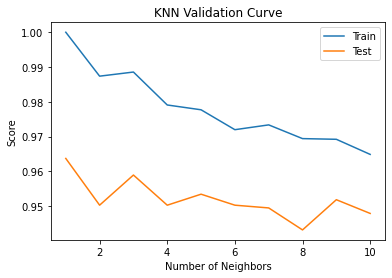

In [27]:
n_neighbors = np.arange(1,11)
fig1 = plt.figure()
plt.plot(n_neighbors, train_mean, label='Train')
plt.plot(n_neighbors, test_mean, label='Test')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.title('KNN Validation Curve')
plt.legend()
plt.show()
fig1.savefig('validation_curve.png')

I would select a k of 3 (I would be hesitant about selecting k = 1 despite it having the highest scores because it would likely be sensitive to outliers in unseen data due to overfitting). I would choose k = 3 because both test and train scores increase from k=2 to k=3 and then decrease as k increases beyond that).

## 6. Fit each of the following models and use 5-fold cross-validation to compute the mean test accuracy.


## (a) K-nearest neighbors (using the value of k that you selected in Part 5)

In [28]:
# knn
model = KNeighborsClassifier(n_neighbors=3)
test_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

In [29]:
test_mean_knn = np.mean(test_scores)

In [30]:
print('Mean test score for the KNN model with 3 nearest neighbors is:', round(test_mean_knn, 3))

Mean test score for the KNN model with 3 nearest neighbors is: 0.959


## (b) Logistic regression

In [31]:
model = LogisticRegression()
test_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

test_mean_lr = np.mean(test_scores)
print('Mean test score for the Logistic Regression is:', round(test_mean_lr, 3))

Mean test score for the Logistic Regression is: 0.958


## (c) Naive Bayes

In [32]:
model = MultinomialNB()
test_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

test_mean_nb = np.mean(test_scores)
print('Mean test score for the Naive Bayes regressor is:', round(test_mean_nb, 3))

Mean test score for the Naive Bayes regressor is: 0.947


We can see that all three models perform well on the test data but the KNN performs best (mean test accuracy score is .959) and naive bayes performs worst (mean test accuracy score of .947). Logistic regression perfomrs very similarly to KNN (mean test accuracy score of .958).

## 7. For each of the models, construct a confusion matrix. Discuss the nature of any misclassification errors. How do the different models compare?

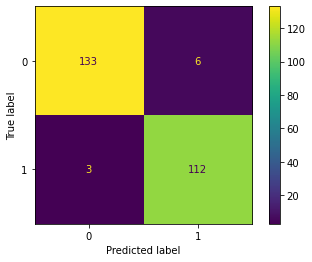

In [33]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(Xtrain, ytrain)
predictions = model.predict(Xtest)
cm = confusion_matrix(ytest, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

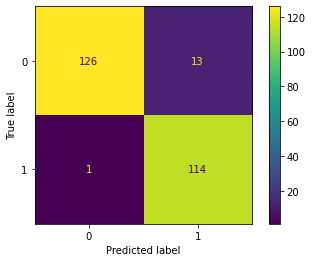

In [34]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)
predictions = model.predict(Xtest)
cm = confusion_matrix(ytest, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

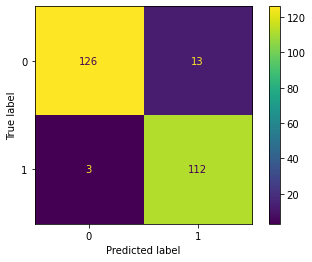

In [35]:
model = MultinomialNB()
model.fit(Xtrain, ytrain)
predictions = model.predict(Xtest)
cm = confusion_matrix(ytest, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

## 8. Plot the ROC curves for all three models on one figure. Based on your assessment of the mean test accuracy, confusion matrices, and ROC curves, which model performs best?

In [44]:
# true positives and false positives
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)
y_pred_knn = knn.predict_proba(Xtest)
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_pred_knn[:,1], pos_label=1)
rates_knn = pd.DataFrame(dict(fpr=false_positive_rate, tpr=true_positive_rate))
roc_auc_knn = auc(rates_knn['fpr'], rates_knn['tpr'])
print('AUC knn: ', roc_auc_knn)

AUC knn:  0.985455114169534


In [45]:
# true positives and false positives
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
y_pred_lr = lr.predict_proba(Xtest)
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_pred_lr[:,1], pos_label=1)
rates_lr = pd.DataFrame(dict(fpr=false_positive_rate, tpr=true_positive_rate))
roc_auc_lr = auc(rates_lr['fpr'], rates_lr['tpr'])
print('AUC logistic regression: ', roc_auc_lr)

AUC logistic regression:  0.9938692524241477


In [46]:
# true positives and false positives
nb = MultinomialNB()
nb.fit(Xtrain, ytrain)
y_pred_nb = nb.predict_proba(Xtest)
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_pred_nb[:,1], pos_label=1)
rates_nb = pd.DataFrame(dict(fpr=false_positive_rate, tpr=true_positive_rate))
roc_auc_nb = auc(rates_nb['fpr'], rates_nb['tpr'])
print('AUC Naive Bayes: ', roc_auc_nb)

AUC Naive Bayes:  0.9909289959336879


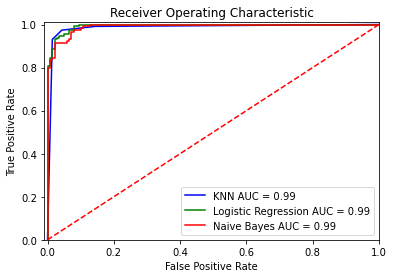

In [47]:
fig3 = plt.figure()
plt.plot(rates_knn.fpr, rates_knn.tpr, 'b', label = 'KNN AUC = %0.2f' % roc_auc_knn)
plt.plot(rates_lr.fpr, rates_lr.tpr, 'g', label = 'Logistic Regression AUC = %0.2f' % roc_auc_lr)
plt.plot(rates_nb.fpr, rates_nb.tpr, 'r', label = 'Naive Bayes AUC = %0.2f' % roc_auc_nb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()
fig3.savefig('roc_curve.png')

I would pick logistic regression because it has the lowest misclassifications in the confusion matrix, and performs almost as well as the top performing model based on the AUC score and mean test accuracy score.